In [37]:
import pandas as pd
import numpy as np

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
train=pd.read_csv('titanic_train.csv')

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
#check missing data
train.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


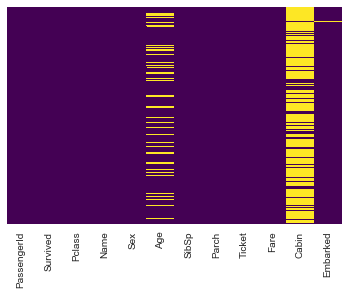

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis' )

In [43]:
sns.set_style('darkgrid')

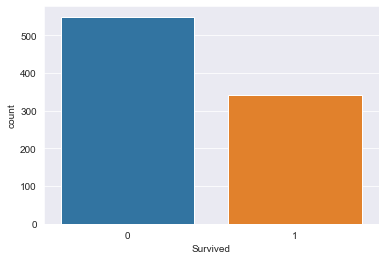

In [44]:
#how many survived titanic crash
sns.countplot(x='Survived',data=train)

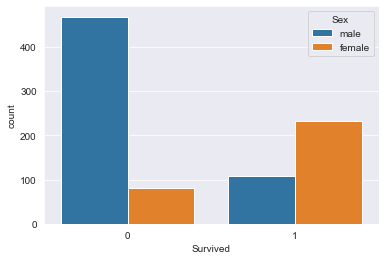

In [45]:
#how many survived based on gender
sns.countplot(x='Survived',hue='Sex',data=train)

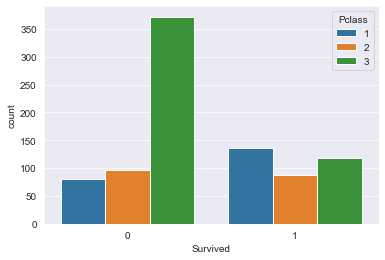

In [46]:
#how many survived based on class
sns.countplot(x='Survived',hue='Pclass',data=train)

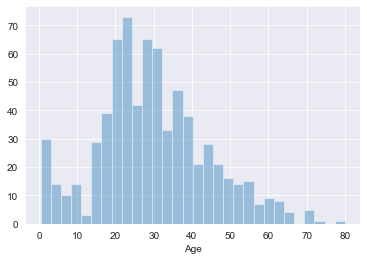

In [47]:
#checking the age of Non null columns in dataset
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

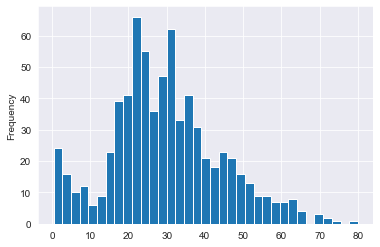

In [48]:
#checking age using pandas own visualitsation 
train['Age'].plot.hist(bins=35)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


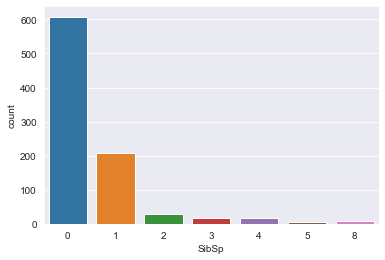

In [50]:
#check whether these people has children and spouse on board
sns.countplot(x='SibSp', data=train)

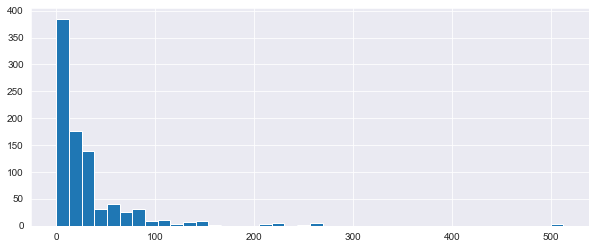

In [51]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [52]:
#now done this plots with cufflinks\
import cufflinks as cf

In [53]:
cf.go_offline()

In [54]:
train['Fare'].iplot(kind='hist',bins=30)

# Cleaning data (Part 2)

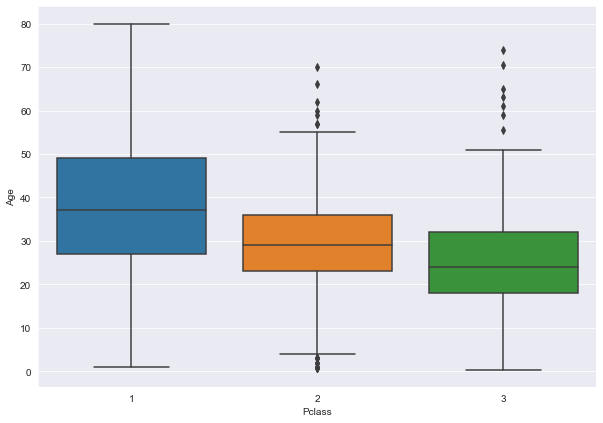

In [55]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [56]:
#filling age column missing value using this function
def guess_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [57]:
train['Age'] = train[['Age','Pclass']].apply(guess_age,axis=1)

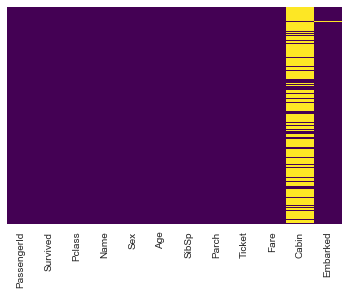

In [58]:
 sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
#drop cabin column 
train.drop('Cabin',axis=1,inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


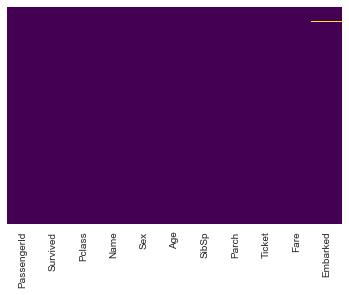

In [61]:
 sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [62]:
#Drop every other missing values in column or row
train.dropna(inplace=True)

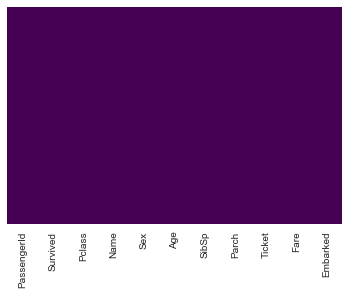

In [63]:
  sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Convert categorical features into dummy variable using Pandas 

In [64]:
#male female column ko read nhi kre ga machine learning algorithm bcz wo string 
#hai to is lia un ko 0 or 1 category me change krna pre ga
sex=pd.get_dummies(train['Sex'],drop_first=True) #dropped female column as 0 show female and 1 show male
sex.head()



,male
0,1
1,0
2,0
3,0
4,1


In [65]:
embark=pd.get_dummies(train['Embarked'],drop_first=True) #dropped c column
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [66]:
#concat new columns
train=pd.concat([train,sex,embark],axis=1)

In [67]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) #already inplaced so thats why error

In [74]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
train.drop('PassengerId',axis=1,inplace=True)

In [71]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train and use model to predict classes (PART 3)

In [75]:
X= train.drop('Survived',axis=1)
y= train['Survived'] #try to predict 

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
#now train and predict a model
from sklearn.linear_model import LogisticRegression

In [83]:
#create a model
logmodel=LogisticRegression()

In [85]:
#fit a model
logmodel.fit(X_train,y_train)

C:\Users\shahz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
#predict a model
predictions=logmodel.predict(X_test)

In [88]:
#classification task
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [90]:
#second way using confusion matrics
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)